# Exercise Twelve: Texts, Three Ways

For this week, I used novels from the Gutenberg project because they had full texts. There wasn't much rhyme or reason to the ones I selected, other than them having interesting titles or being ones that I had previously read. So, read on!

In [4]:
import os
cwd = os.getcwd()
path = "C:\\Users\\inani\\OneDrive\\Desktop\\Novels"

cwd

'C:\\Users\\inani'

## Topic Modeling

In [6]:
import pandas as pd
import os
import numpy as np
documents = []
path = "C:\\Users\\inani\\OneDrive\\Desktop\\Novels"

filenames = sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames))
print(filenames[:10])

10
['C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Candide.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Count of Monty Cristo.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Dubliners.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Japanese Girls and Women.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Leviathan.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Pickle for the Knowing Ones.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Pygmalion.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\Siddartha.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\The Yellow Wallpaper.txt', 'C:\\Users\\inani\\OneDrive\\Desktop\\Novels\\War of the Worlds.txt']


In [7]:
import sklearn.feature_extraction.text as text

vectorizer = text.CountVectorizer(input = 'filename', stop_words = "english", min_df=1)
dtm = vectorizer.fit_transform(filenames).toarray()

vocab = np.array(vectorizer.get_feature_names())

In [8]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (10, 30111). Number of tokens 450530


In [9]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)
vocabulary = vectorizer.get_feature_names()
assert model.components_.shape == (100, len(vocabulary))
assert document_topic_distributions.shape == (dtm.shape[0], 100)  

In [10]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

                00       000     0009m     0011m     0019m     0023m  \
Topic 0   0.237937  0.335443  0.194169  0.184004  0.240808  0.189762   
Topic 1   0.197488  0.274509  0.184671  0.216676  0.207122  0.192429   
Topic 2   0.226230  0.250514  0.216694  0.187564  0.211017  0.206067   
Topic 3   0.219859  0.327713  0.236428  0.184114  0.200921  0.219076   
Topic 4   0.216569  0.346807  0.201075  0.206265  0.217184  0.222891   
...            ...       ...       ...       ...       ...       ...   
Topic 95  0.204099  0.358854  0.163648  0.226625  0.229619  0.204009   
Topic 96  0.200308  0.299750  0.238585  0.212521  0.229581  0.228826   
Topic 97  0.209417  0.290570  0.158161  0.206559  0.195335  0.204160   
Topic 98  0.210859  0.378469  0.226140  0.215979  0.181068  0.162027   
Topic 99  0.199859  0.342573  0.207714  0.198750  0.191784  0.226908   

             0025m     0027m     0029m     0035m  ...       καὶ       μὲν  \
Topic 0   0.234634  0.166539  0.227590  0.183482  ...  0.2

In [11]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)

said         3.380196
man          2.794235
time         1.902662
men          1.822909
higgins      1.464354
yes          1.448442
god          1.443119
count        1.373719
know         1.337315
like         1.291923
did          1.238977
shall        1.200800
cristo       1.095538
say          1.093216
old          1.081811
monte        1.040097
villefort    1.027820
think        1.009362
Name: Topic 9, dtype: float64

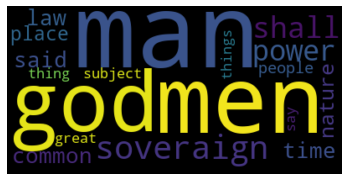

In [13]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

wordcloud = WordCloud().generate_from_frequencies(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [14]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\inani\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\inani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
for filename in filenames:
    with open(filename, encoding="utf-8") as f:
        text = f.read()
        documents.append(text)
        scores = sid.polarity_scores(text[0:500])
    print(filename)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    print(' ')

C:\Users\inani\OneDrive\Desktop\Novels\Candide.txt
compound: -0.0258, neg: 0.06, neu: 0.882, pos: 0.058,  
C:\Users\inani\OneDrive\Desktop\Novels\Count of Monty Cristo.txt
compound: -0.5267, neg: 0.042, neu: 0.958, pos: 0.0,  
C:\Users\inani\OneDrive\Desktop\Novels\Dubliners.txt
compound: -0.5719, neg: 0.102, neu: 0.836, pos: 0.062,  
C:\Users\inani\OneDrive\Desktop\Novels\Japanese Girls and Women.txt
compound: 0.7506, neg: 0.0, neu: 0.912, pos: 0.088,  
C:\Users\inani\OneDrive\Desktop\Novels\Leviathan.txt
compound: 0.7125, neg: 0.0, neu: 0.903, pos: 0.097,  
C:\Users\inani\OneDrive\Desktop\Novels\Pickle for the Knowing Ones.txt
compound: 0.6908, neg: 0.0, neu: 0.909, pos: 0.091,  
C:\Users\inani\OneDrive\Desktop\Novels\Pygmalion.txt
compound: 0.4497, neg: 0.034, neu: 0.895, pos: 0.071,  
C:\Users\inani\OneDrive\Desktop\Novels\Siddartha.txt
compound: 0.9042, neg: 0.0, neu: 0.87, pos: 0.13,  
C:\Users\inani\OneDrive\Desktop\Novels\The Yellow Wallpaper.txt
compound: 0.747, neg: 0.023, ne

## Generation

In [17]:
import markovify
import random
generator_text = ""

for document in documents:
    generator_text += document

In [18]:
text_model = markovify.Text(generator_text)
print( text_model.make_sentence() )

This may appear to be, like the wheels of a sharp noise that brought his daughter’s room.


In [19]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"

print(novel)

But when it shall seem good in his pale and motionless; when Monte Cristo smiled, not with them. He says that if I had to go back to business. We haven’t many of the 4th of September, M. Morrel had returned at this singular man, who was overwhelmed as he ran—a grotesque mingling of many things, Kamala, you’ll see. The shutters of a superior for an explanation. Surely we may read, Marke 13..26. and 14.26. and more spiritual than others, more supple, more willing. 

With that realisation my interest shifted to those that beleeved we read of the young girl fixed her imperious look of deep tenderness, while the terror to think that she carried away to the Vitriol Works and then be escorted back to Rome. When our little treasure for the Château d’If, got on board of which the cardinals already held; and then starts out with Mr Bartell D’Arcy and Miss Delacour were standing about it, to live her own children, who learn the joys and sorrows, without being exactly Minister, governed Spain unde